<b>POS_CASH_balance.csv</b>
- Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.


<a id="top"></a>
- [Overview](#overview)
- [SK_ID_PREV](#sk-id-prev)
- [SK_ID_CURR](#sk-id-curr)
- [MONTHS_BALANCE](#months-balance)
- [CNT_INSTALMENT](#cnt-instalment)
- [CNT_INSTALMENT_FUTURE](#cnt-insalment-future)
- [NAME_CONTRACT_STATUS](#name-contract-status)
- [SK_DPD](#sk-dpd)
- [SK_DPD_DEF](#sk-dpd-def)


## Prepare

In [1]:
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 999

# データロード
pos =  feather.read_dataframe('../input/POS_CASH_balance.feather')
app_trn = feather.read_dataframe('../input/application_train.feather')


def target_bar(df, col, title=None):

    df0 = df[df["TARGET"] == 0]
    df1 = df[df["TARGET"] == 1]

    t0 = df0[col].value_counts().rename(col + '0')
    t1 = df1[col].value_counts().rename(col + '1')
    t = pd.concat([t0, t1], axis=1).fillna(0).astype(int)
    t['total'] = t.sum(axis=1)
    t.sort_values('total', inplace=True, ascending=False)
    t.drop(columns=['total'], inplace=True)

    idx = np.arange(len(t))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))

    p1 = ax.bar(idx, t[col + '0'], width)
    p2 = ax.bar(idx+width, t[col + '1'], width)
    ax.legend((p1[0], p2[0]), ('Target=0', 'Target=1'))
    ax.set_title(title)
    ax.set_xticks(idx + width / 2)
    ax.set_xticklabels(t.index.values, rotation=45)

    plt.show()
    
def target_hist(df, col, title):

    df0 = df[df["TARGET"] == 0]
    df1 = df[df["TARGET"] == 1]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.distplot(df0[col].dropna(), ax=axes[0], color='b')
    axes[0].set_title('Target=0')
    sns.distplot(df1[col].dropna(), ax=axes[1], color='orange')
    axes[1].set_title('Target=1')
    fig.suptitle(title)
    plt.show()

<a id='overview'></a>
## Overview

In [2]:
pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [3]:
pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
SK_ID_PREV               int64
SK_ID_CURR               int64
MONTHS_BALANCE           int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS     object
SK_DPD                   int64
SK_DPD_DEF               int64
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [4]:
pos.notnull().sum() / len(pos)

SK_ID_PREV               1.000000
SK_ID_CURR               1.000000
MONTHS_BALANCE           1.000000
CNT_INSTALMENT           0.997393
CNT_INSTALMENT_FUTURE    0.997392
NAME_CONTRACT_STATUS     1.000000
SK_DPD                   1.000000
SK_DPD_DEF               1.000000
dtype: float64

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="sk-id-prev"></a>
## SK_ID_PREV
decription : ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)

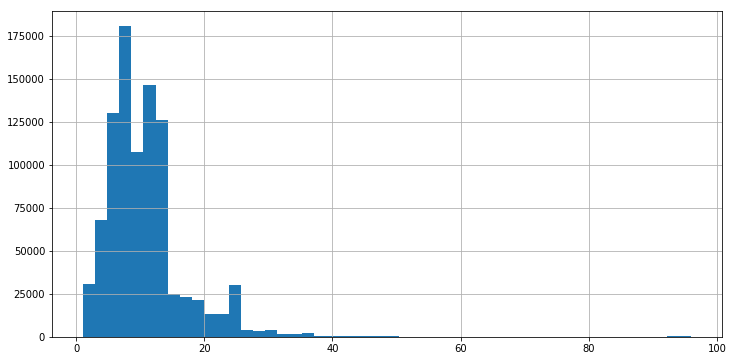

In [5]:
pos.SK_ID_PREV. value_counts().hist(bins=50, figsize=(12, 6))
plt.show()

SK_ID_PREVが複数回出現している。ちょっとよくわからない。

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="sk-id-curr"></a>
## SK_ID_CURR
description : ID of loan in our sample

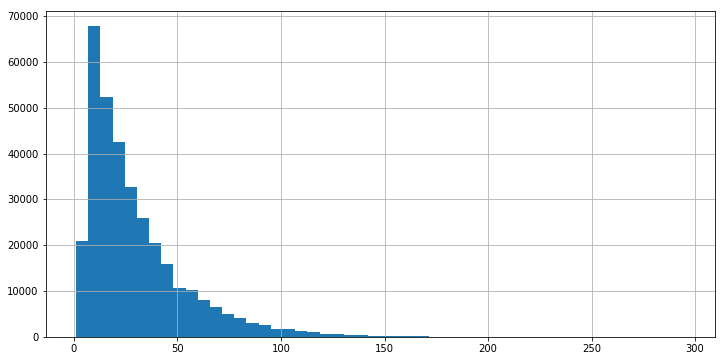

In [6]:
pos.SK_ID_CURR. value_counts().hist(bins=50, figsize=(12, 6))
plt.show()

SK_ID_CURR            1.000000
TARGET                1.000000
CNT_POS_SK_ID_CURR    0.941248
dtype: float64


c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


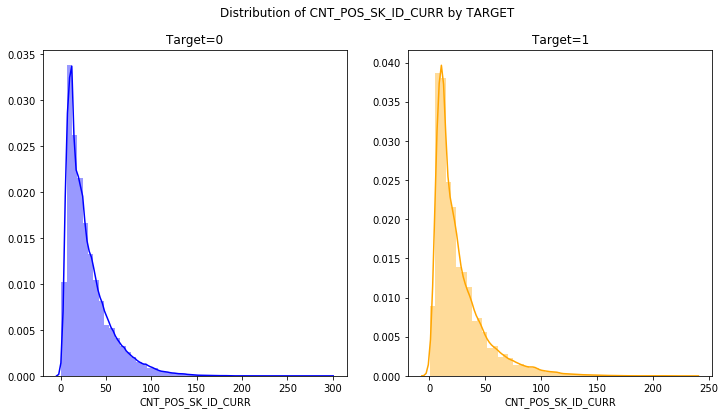

In [7]:
pos_cnt_sk_id_curr = pos.groupby('SK_ID_CURR').size().rename('CNT_POS_SK_ID_CURR').reset_index()

app_pos_cnt_sk_id_curr = app_trn[['SK_ID_CURR', 'TARGET']].merge(pos_cnt_sk_id_curr, on='SK_ID_CURR', how='left')
print(app_pos_cnt_sk_id_curr.notnull().sum() / len(app_pos_cnt_sk_id_curr))
target_hist(app_pos_cnt_sk_id_curr, 'CNT_POS_SK_ID_CURR', 'Distribution of CNT_POS_SK_ID_CURR by TARGET')

- 94%ほどのSK_ID_CURRはprevious creditを持っている
- TARGET = 0の方が分布の裾が長い、たくさんprevious creditがある方が実績あって信頼できる？

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="months-balance"></a>
## MONTHS_BALANCE
description : Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )

In [8]:
pos.MONTHS_BALANCE.describe()

count    1.000136e+07
mean    -3.501259e+01
std      2.606657e+01
min     -9.600000e+01
25%     -5.400000e+01
50%     -2.800000e+01
75%     -1.300000e+01
max     -1.000000e+00
Name: MONTHS_BALANCE, dtype: float64

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


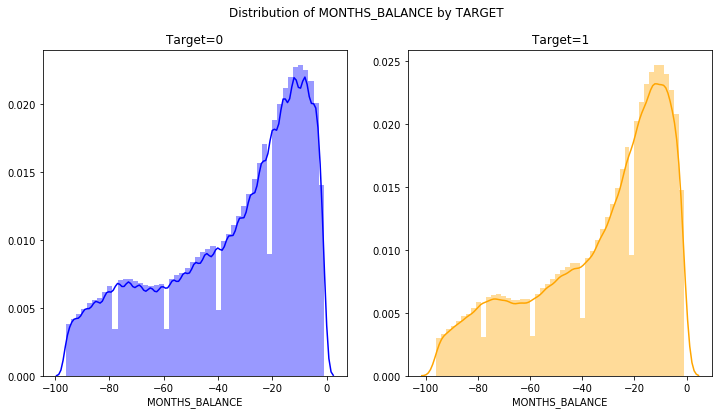

In [9]:
pos_months_balance = pos[['SK_ID_CURR', 'MONTHS_BALANCE']].copy().merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left'
)
target_hist(pos_months_balance, 'MONTHS_BALANCE', 'Distribution of MONTHS_BALANCE by TARGET')

情報の古さがわかる？同じSK_ID_PREVだと重複しないということか？

In [10]:
pos[pos.SK_ID_PREV == pos.SK_ID_PREV.unique()[10]].sort_values('MONTHS_BALANCE')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
10,2328294,287361,-32,12.0,12.0,Active,0,0
4720002,2328294,287361,-31,12.0,11.0,Active,0,0
4792596,2328294,287361,-30,12.0,10.0,Active,0,0
5514072,2328294,287361,-29,12.0,9.0,Active,0,0
6344380,2328294,287361,-28,12.0,8.0,Active,0,0
4991328,2328294,287361,-27,12.0,7.0,Active,0,0
3171258,2328294,287361,-26,12.0,6.0,Active,0,0
4570351,2328294,287361,-25,12.0,5.0,Active,0,0
3195709,2328294,287361,-24,12.0,4.0,Active,0,0
2638362,2328294,287361,-23,12.0,3.0,Active,0,0


In [11]:
pos[pos.SK_ID_PREV == pos.SK_ID_PREV.unique()[2000]].sort_values('MONTHS_BALANCE')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
6762551,2745205,114794,-53,24.0,24.0,Active,0,0
7173161,2745205,114794,-52,24.0,23.0,Active,0,0
7634534,2745205,114794,-51,24.0,22.0,Active,0,0
854403,2745205,114794,-50,24.0,21.0,Active,0,0
4569897,2745205,114794,-49,24.0,20.0,Active,0,0
4193965,2745205,114794,-48,24.0,19.0,Active,0,0
4040062,2745205,114794,-47,24.0,18.0,Active,0,0
3738685,2745205,114794,-46,24.0,17.0,Active,0,0
3118585,2745205,114794,-45,24.0,16.0,Active,0,0
1815866,2745205,114794,-44,24.0,15.0,Active,0,0


そういうことに見える、マイナスの数字が大きい（値が小さい）ほど古い情報で基本的にNAME_CONTRACT_STATUS = Completedで終了している

最小は-100

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


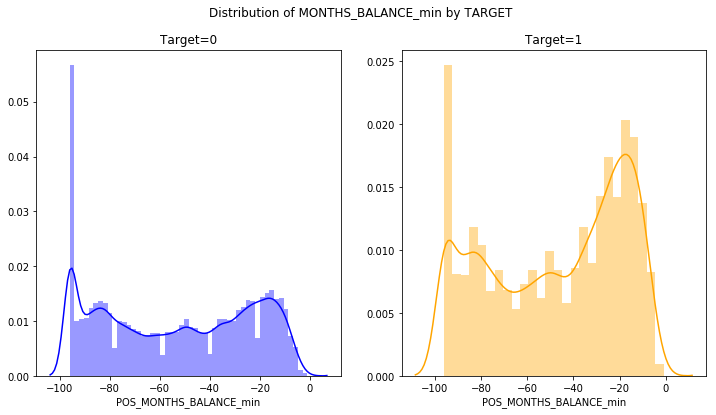

In [12]:
pos_months_balance_min = pos.groupby('SK_ID_CURR').MONTHS_BALANCE.min().rename('POS_MONTHS_BALANCE_min').reset_index()
pos_months_balance_min = pos_months_balance_min.merge(app_trn[['SK_ID_CURR', 'TARGET']],
                                                                                           on='SK_ID_CURR', how='left')
target_hist(pos_months_balance_min, 'POS_MONTHS_BALANCE_min', 'Distribution of MONTHS_BALANCE_min by TARGET')

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


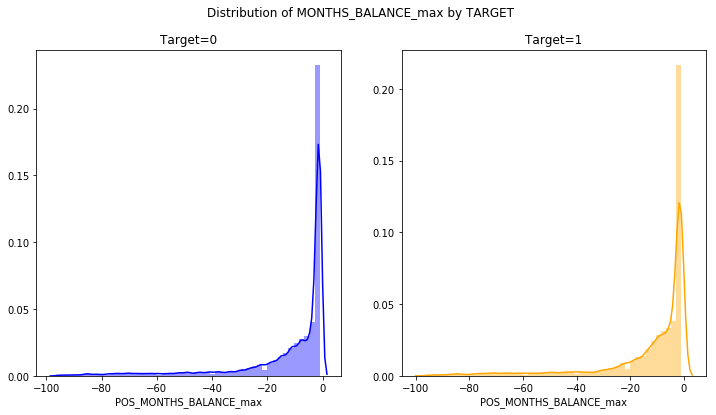

In [13]:
pos_months_balance_max = pos.groupby('SK_ID_CURR').MONTHS_BALANCE.max().rename('POS_MONTHS_BALANCE_max').reset_index()
pos_months_balance_max = pos_months_balance_max.merge(app_trn[['SK_ID_CURR', 'TARGET']],
                                                                                            on='SK_ID_CURR', how='left')
target_hist(pos_months_balance_max, 'POS_MONTHS_BALANCE_max', 'Distribution of MONTHS_BALANCE_max by TARGET')

<a id="cnt-instalment"></a>
## CNT_INSTALMENT
description : Term of previous credit (can change over time)

分割払いの回数、途中で変わる？

In [14]:
pos[pos.SK_ID_PREV == pos.SK_ID_PREV.unique()[10]].CNT_INSTALMENT

10         12.0
438434     12.0
2384477    12.0
2638362    12.0
3171258    12.0
3195709    12.0
4570351    12.0
4720002    12.0
4792596    12.0
4991328    12.0
5046777    12.0
5514072    12.0
6344380    12.0
Name: CNT_INSTALMENT, dtype: float64

基本的に同一SK_ID_PREVでは全部同じなのかな

In [15]:
pos.CNT_INSTALMENT.describe()

count    9.975287e+06
mean     1.708965e+01
std      1.199506e+01
min      1.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      2.400000e+01
max      9.200000e+01
Name: CNT_INSTALMENT, dtype: float64

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


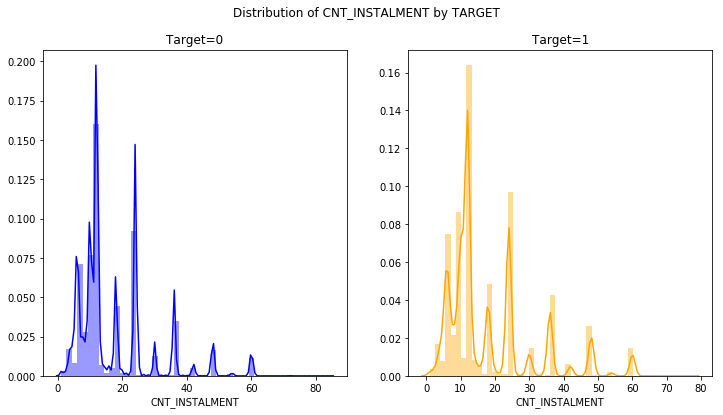

In [16]:
pos_cnt_instalment = pos[['SK_ID_CURR', 'CNT_INSTALMENT']].copy().merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left'
)
target_hist(pos_cnt_instalment, 'CNT_INSTALMENT', 'Distribution of CNT_INSTALMENT by TARGET')

切りの良い6, 12, 18, 24, 30, 36ヶ月あたりでデータが増えているよね

In [17]:
unique_instalment = pos.groupby("SK_ID_PREV").CNT_INSTALMENT.nunique()

In [18]:
unique_instalment.describe()

count    936325.000000
mean          1.327098
std           0.477809
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          12.000000
Name: CNT_INSTALMENT, dtype: float64

支払回数は2回変更くらいまでが基本

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


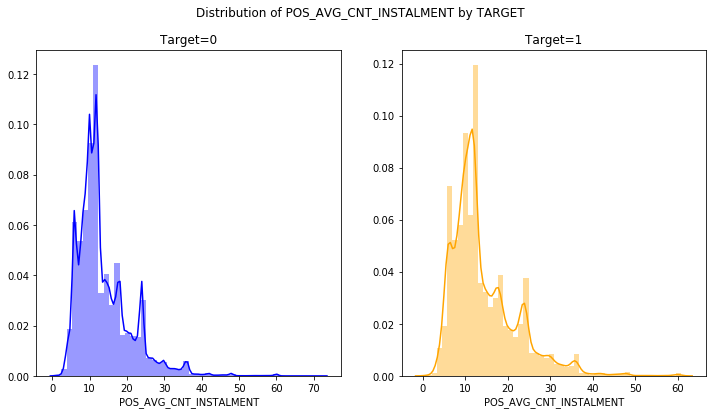

In [19]:
pos_avg_instalment = pos.groupby('SK_ID_PREV').agg({'SK_ID_CURR': 'first', 'CNT_INSTALMENT': 'mean'})
pos_avg_instalment = pos_avg_instalment.groupby('SK_ID_CURR').CNT_INSTALMENT.mean().rename('POS_AVG_CNT_INSTALMENT').reset_index()
pos_avg_instalment = pos_avg_instalment.merge(app_trn[['SK_ID_CURR', 'TARGET']],
                                                                          on='SK_ID_CURR',
                                                                          how='left')

target_hist(pos_avg_instalment, 'POS_AVG_CNT_INSTALMENT', 'Distribution of POS_AVG_CNT_INSTALMENT by TARGET')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="cnt-instalment-future"></a>
## CNT_INSTALMENT_FUTURE
description : Installments left to pay on the previous credit

残りの支払い回数、これは時系列で見ないとあまり意味がないな、※一旦保留

見たら面白そうなやつ
- 支払いに失敗していないか？
- MONTHS_BALANCEとの関係
- CNT_INSTAKMENTが変更されたときのCNT_INSTALMENT_FUTUREの動き

In [20]:
pos[pos.SK_ID_PREV == pos.SK_ID_PREV.unique()[10]][['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']].sort_values('MONTHS_BALANCE')

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE
10,-32,12.0,12.0
4720002,-31,12.0,11.0
4792596,-30,12.0,10.0
5514072,-29,12.0,9.0
6344380,-28,12.0,8.0
4991328,-27,12.0,7.0
3171258,-26,12.0,6.0
4570351,-25,12.0,5.0
3195709,-24,12.0,4.0
2638362,-23,12.0,3.0


In [21]:
pos[pos.SK_ID_PREV == pos.SK_ID_PREV.unique()[20000]][['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']].sort_values('MONTHS_BALANCE')

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE
3526318,-39,36.0,36.0
7994080,-38,36.0,35.0
5365461,-37,36.0,34.0
4376241,-36,36.0,33.0
8474217,-35,36.0,32.0
4375524,-34,36.0,31.0
4863478,-33,36.0,30.0
1827808,-32,36.0,29.0
3610375,-31,36.0,28.0
2380208,-30,36.0,26.0


<div style="text-align: right;">
[back to top](#top)
</div>

<a id="name-contract-status"></a>

## NAME_CONTRACT_STATUS

In [22]:
pos.NAME_CONTRACT_STATUS.unique()

array(['Active', 'Completed', 'Signed', 'Approved',
       'Returned to the store', 'Demand', 'Canceled', 'XNA',
       'Amortized debt'], dtype=object)

In [23]:
# pos_name_contract_status = pos.sort_values(['SK_ID_PREV', 'MONTHS_BALANCE']).groupby('SK_ID_PREV').agg({'SK_ID_CURR': 'first', 'NAME_CONTRACT_STATUS': 'unique'})

In [24]:
# pos_name_contract_status = pos_name_contract_status.merge(app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')
# target_bar(pos_name_contract_status, 'NAME_CONTRACT_STATUS', 'Value counts of NAME_CONTRACT_STATUS by Target')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="sk-dpd"></a>
## SK_DPD
DPD = 支払い期日

description : DPD (days past due) during the month of previous credit

ちょっとよくわからないからそのうち戻ってくる

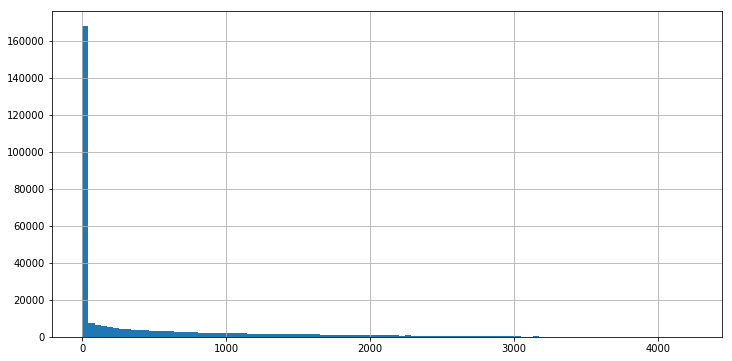

In [30]:
pos[pos.SK_DPD > 0].SK_DPD.hist(bins=100, figsize=(12,6))

In [37]:
        i
pos.sort_values(['SK_ID_PREV', 'MONTHS_BALANCE']).head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
6030662,1000001,158271,-10,12.0,12.0,Active,0,0
8470736,1000001,158271,-9,12.0,11.0,Active,0,0
45995,1000001,158271,-8,2.0,0.0,Completed,0,0
4467804,1000002,101962,-54,4.0,4.0,Active,0,0
3346102,1000002,101962,-53,6.0,3.0,Active,0,0


<div style="text-align: right;">
[back to top](#top)
</div>

<a id="sk-dpd-def"></a>
## SK_DPD_DEF
DPD = 支払い期日

description : DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit

ちょっとよくわからないからそのうち戻ってくる2
